In [52]:
import os
import csv
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

In [ ]:
BASE_URL = "https://api.covidtracking.com/v1"

# Define all endpoints
endpoints = {
    "us_daily": "/us/daily.json",
    "states_daily": "/states/daily.json",
}

# Fetch and save data for each endpoint
for name, endpoint in endpoints.items():
    url = BASE_URL + endpoint

    response = requests.get(url)
    response.raise_for_status()  # Raises an HTTPError for bad responses
    
    data = response.json()
    
    # Handle case where data might be a list of dictionaries or a single dictionary
    if isinstance(data, list):
        df = pd.DataFrame(data)
    else:
        df = pd.DataFrame([data])  # Wrap single dict in a list
        
    df.to_csv(f"{name}.csv", index=False)
    print(f"✅ Successfully saved {name}.csv")

In [ ]:
# Load datasets
us_current = pd.read_csv("us_current.csv")
states_daily = pd.read_csv("states_daily.csv")
states_current = pd.read_csv("states_current.csv")
states_info = pd.read_csv("states_info.csv")

## US Daily

### Description

1. Let's investigate what kind of data we have in us_daily.csv
2. Let's detect outlier data
3. Analyze missing values
4. Prepare the ETL
5. Choose variables, how can I relate them with other variables to analyze?

In [ ]:
# Load dataset
us_daily = pd.read_csv("us_daily.csv")

In [53]:
# Let's check the dataset
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

print(us_daily.tail())

       date  states    positive    negative  pending  hospitalizedCurrently  hospitalizedCumulative  inIcuCurrently  inIcuCumulative  onVentilatorCurrently  onVentilatorCumulative           dateChecked     death  hospitalized  totalTestResults lastModified  recovered  total  posNeg  deathIncrease  hospitalizedIncrease  negativeIncrease  positiveIncrease  totalTestResultsIncrease                                      hash
4  20210303      56  28520365.0  73857281.0  11778.0                45462.0                770821.0          9359.0          45214.0                 3094.0                  4260.0  2021-03-03T24:00:00Z  508665.0      770821.0         357888671   2021-03-03        NaN      0       0           2449                  2172            267001             66836                   1406795  fef6c425d2b773a9221fe353f13852f3e4a4bfb0
3  20210304      56  28585852.0  74035238.0  12405.0                44172.0                772351.0          8970.0          45293.0                 297

In [ ]:
num_cols = us_daily.select_dtypes(include=[np.number]).columns

def detect_outliers_zscore(data, threshold=3):
    z_scores = np.abs((data - data.mean()) / data.std())
    return z_scores 

In [37]:
# Fix lasModified
us_daily['lastModified'] = us_daily['lastModified'].str.replace('T24:00:00Z', 'T00:00:00Z')
us_daily['lastModified'] = pd.to_datetime(us_daily['lastModified'], format='%Y-%m-%dT%H:%M:%SZ')

us_daily = us_daily.sort_values('lastModified')

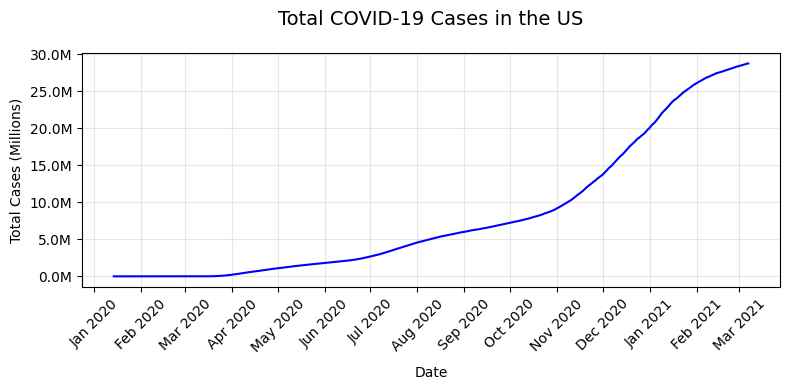

In [54]:
# Total positive cases in the US
plt.figure(figsize=(8, 4))

plt.plot(us_daily['lastModified'], us_daily['positive']/1e6, color='blue', linewidth=1.5)

plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.1f}M')) 


plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)

# Add labels
plt.title("Total COVID-19 Cases in the US", fontsize=14, pad=20)
plt.xlabel("Date", fontsize=10, labelpad=8)
plt.ylabel("Total Cases (Millions)", fontsize=10)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

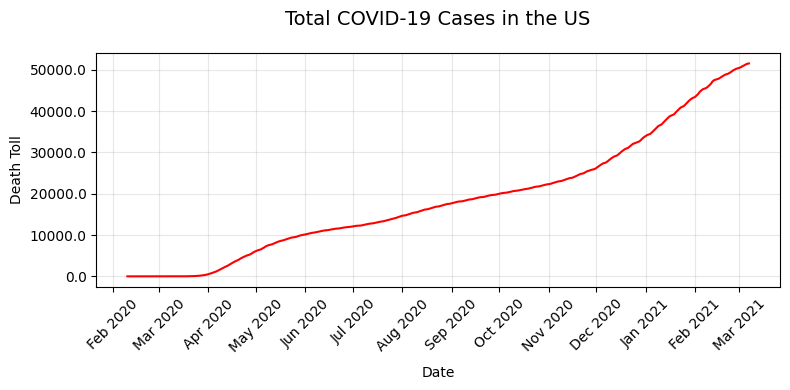

In [ ]:
# Total deaths in the US
plt.figure(figsize=(8, 4))

plt.plot(us_daily['lastModified'], us_daily['death'], color='red', linewidth=1.5)

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/10:.1f}'))


plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)

# Add labels
plt.title("Total COVID-19 Cases in the US", fontsize=14, pad=20)
plt.xlabel("Date", fontsize=10, labelpad=8)
plt.ylabel("Death Toll", fontsize=10)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# Load datasets
us_current = pd.read_csv("us_current.csv")
states_daily = pd.read_csv("states_daily.csv")
states_current = pd.read_csv("states_current.csv")
states_info = pd.read_csv("states_info.csv")

## US Daily

### Description

> Investigation and analysis of data

In [ ]:
# Load datasets
us_daily = pd.read_csv("us_daily.csv")

# Get summary statistics for numerical columns
numerical_summary = us_daily.describe()

# Get summary for non-numerical columns
categorical_summary = us_daily.describe(include=['object'])

print("Numerical Summary:")
print(numerical_summary)
print("\nCategorical Summary:")
print(categorical_summary)

In [ ]:
us_daily['daily_new_cases'] = us_daily['positive'].diff()

In [ ]:
print("Total deaths:", us_daily['death'].max())
print("Peak hospitalized:", us_daily['hospitalizedCurrently'].max())

In [ ]:
# Load datasets
us_current = pd.read_csv("us_current.csv")
states_daily = pd.read_csv("states_daily.csv")
states_current = pd.read_csv("states_current.csv")
states_info = pd.read_csv("states_info.csv")

## US Daily

### Description

> Investigation and analysis of data

In [ ]:
# Load datasets
us_daily = pd.read_csv("us_daily.csv")

# Get summary statistics for numerical columns
numerical_summary = us_daily.describe()

# Get summary for non-numerical columns
categorical_summary = us_daily.describe(include=['object'])

print("Numerical Summary:")
print(numerical_summary)
print("\nCategorical Summary:")
print(categorical_summary)

In [ ]:
us_daily['daily_new_cases'] = us_daily['positive'].diff()

In [ ]:
print("Total deaths:", us_daily['death'].max())
print("Peak hospitalized:", us_daily['hospitalizedCurrently'].max())